 # Preprocessing

In [22]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
###
from google.colab import drive
import spacy
import gensim
import pandas as pd
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [23]:
FROM_DRIVE = True

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

if FROM_DRIVE:
  sheet_id = "12V2euXZRC9uSeRyWUZNSV8A2LBfGSbSUpfTo6hdkMBU"
  sheet_name = "spacenews"
  url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
  DataSet = pd.read_csv(url)
else:
  DataSet = pd.read_csv('adult.csv')
  DataSet_test = pd.read_csv('spacenews.csv')
  DataSet = DataSet.append(DataSet_test, ignore_index=True)

DataSet


,title,content
0,Astrocast buying Hiber to boost funding and ex...,"TAMPA, Fla. — Cash-strapped smallsat operator ..."
1,Sierra Space to partner with Spirit AeroSystem...,WASHINGTON — Sierra Space announced May 31 a s...
2,Rocket to launch China’s next space station mo...,HELSINKI — A Long March 5B rocket has arrived ...
3,Against Quad? China launches satellite-based E...,"SEOUL, South Korea — In what appears to be a t..."
4,House committee questions proposed delay in NA...,WASHINGTON — Members of the House Science Comm...
...,...,...
17469,Kendall lays out Pentagon thinking on future s...,"\nFrank Kendall, the Pentagon’s top acquisitio..."
17470,A larger share of NOAA’s declining space budge...,Updated Feb. 10 at 10:18 p.m. Eastern The U.S....
17471,Think Tank Turns Its Attention To Mars As 2016...,WASHINGTON — As NASA develops a long-term stra...
17472,House Bill Leaves Last Three JPSS Satellites i...,WASHINGTON — A spending bill the House passed ...


In [32]:
DataSet = DataSet.dropna()
unspliteddocuments = DataSet['content'].values.tolist()
documents = []
for i in unspliteddocuments:
    documents.append(i.split())
# documents
avrage = 0
maximum = [0,""]
minimum = [0,""]
maximumCount = len(documents[0])
minimumCount = len(documents[0])

for i,content in enumerate(documents):
    avrage = avrage + len(content)
    if len(content) > maximumCount:
        maximumCount = len(content)
        maximum[0] = i
        maximum[1] = content
    if len(content) < minimumCount and len(content) > 10:
        minimumCount = len(content)
        minimum[0] = i
        minimum[1]= content

avrage = avrage / len(documents)

print(f'Number of documents in my collection: {len(documents)}')
print(f'The avrage number of words in my collection {avrage}')
print(f'Longest document of my collection has {maximumCount} words: ' + str(maximum))
print(f'Shortest document of my collection has {minimumCount} words: ' + str(minimum))

Number of documents in my collection: 17303
The avrage number of words in my collection 632.8473675085245
Longest document of my collection has 6558 words: [9130, ['The', 'drama', 'and', 'uncertainty', 'surrounding', 'the', 'U.S.', 'government', 'launch', 'enterprise', 'and', 'its', 'incumbent', 'provider,', 'United', 'Launch', 'Alliance,', 'in', '2015', 'stood', 'out', 'in', 'contrast', 'to', 'the', 'situation', 'in', 'Europe,', 'which', 'after', 'some', 'early', 'hiccups', 'now', 'appears', 'on', 'track', 'with', 'development', 'of', 'the', 'next-generation', 'Ariane', '6', 'rocket', 'and', 'an', 'upgraded', 'version', 'of', 'the', 'smaller', 'Vega.', 'Meanwhile,', 'a', 'number', 'of', 'startups', 'planning', 'huge', 'constellations', 'of', 'low-orbiting', 'satellites', 'emerged', 'from', 'the', 'woodwork,', 'with', 'OneWeb', 'leading', 'the', 'pack', 'with', '$500', 'million', 'in', 'investment', 'and', 'satellite', 'construction', 'and', 'launch', 'contracts.', 'The', 'U.S.', 'Expo

In [25]:
documents[9130]

['The',
 'drama',
 'and',
 'uncertainty',
 'surrounding',
 'the',
 'U.S.',
 'government',
 'launch',
 'enterprise',
 'and',
 'its',
 'incumbent',
 'provider,',
 'United',
 'Launch',
 'Alliance,',
 'in',
 '2015',
 'stood',
 'out',
 'in',
 'contrast',
 'to',
 'the',
 'situation',
 'in',
 'Europe,',
 'which',
 'after',
 'some',
 'early',
 'hiccups',
 'now',
 'appears',
 'on',
 'track',
 'with',
 'development',
 'of',
 'the',
 'next-generation',
 'Ariane',
 '6',
 'rocket',
 'and',
 'an',
 'upgraded',
 'version',
 'of',
 'the',
 'smaller',
 'Vega.',
 'Meanwhile,',
 'a',
 'number',
 'of',
 'startups',
 'planning',
 'huge',
 'constellations',
 'of',
 'low-orbiting',
 'satellites',
 'emerged',
 'from',
 'the',
 'woodwork,',
 'with',
 'OneWeb',
 'leading',
 'the',
 'pack',
 'with',
 '$500',
 'million',
 'in',
 'investment',
 'and',
 'satellite',
 'construction',
 'and',
 'launch',
 'contracts.',
 'The',
 'U.S.',
 'Export-Import',
 'Bank’s',
 'brush',
 'with',
 'death',
 'was',
 'another',
 'not

In [26]:
# Do rocha
new_docs = []
for i,doc in enumerate(unspliteddocuments[:100]):
    # print(f"Doc: {i}")
    # cleaning

    clean = " ".join(word for word in gensim.utils.simple_preprocess(doc, min_len = 4))
    
    # removing stops and digits
    tdoc=nlp(clean)
    stops_and_digits_removed  = " ".join(token.text for token in tdoc if not token.is_stop and not token.is_digit and not token.text == 'will' and not token.text == 'say' and not token.text == 'said' and not token.text == 'going')

    # lemmatization
    # new_doc = " ".join(token.lemma_ for token in tdoc)

    new_docs.append(stops_and_digits_removed)

new_docs[:5]


['tampa cash strapped smallsat operator astrocast announced plans dutch connectivity solutions provider hiber scrapped plans constellation year following failures initial satellites switzerland based astrocast deal spectrum americas enable growing constellation connecting internet things devices operate globally astrocast plans issue shares fund acquisition hiber agreed invest million astrocast second stock market listing later year help swiss startup meet near term funding needs astrocast hopes raise million euros million listing shares euronext growth paris junior stock market france startup needs funds expand constellation satellites including test spacecraft improve coverage astrocast aims operating satellites earth orbit unit cubesats astrocast later models larger unit cubesats astrocast public company august raised million listing shares euronext growth oslo norway operator launched commercially february regions outside americas according astrocast spokesperson fatima vigil perez

In [27]:

unspliteddocuments[0]

'TAMPA, Fla. — Cash-strapped smallsat operator Astrocast announced plans May 30 to buy Dutch connectivity solutions provider Hiber, which scrapped plans for its own constellation last year following failures on its initial satellites.  Switzerland-based Astrocast said the deal would give it spectrum in the Americas to enable its growing constellation for connecting Internet of Things (IoT) devices to operate globally. Astrocast plans to issue new shares to fund the acquisition. Hiber has also agreed to invest around $11 million in Astrocast’s second stock market listing later this year to help the Swiss startup meet near-term funding needs.  Astrocast hopes to raise 60-80 million euros ($64-86 million) by listing shares on the Euronext Growth Paris junior stock market in France. The startup said it needs more funds to expand its constellation of 12 satellites — including two test spacecraft — to 20 before the end of 2022, and to 40 in 2023 to improve coverage.  By 2025, Astrocast aims 

In [28]:
new_docs[0]

'tampa cash strapped smallsat operator astrocast announced plans dutch connectivity solutions provider hiber scrapped plans constellation year following failures initial satellites switzerland based astrocast deal spectrum americas enable growing constellation connecting internet things devices operate globally astrocast plans issue shares fund acquisition hiber agreed invest million astrocast second stock market listing later year help swiss startup meet near term funding needs astrocast hopes raise million euros million listing shares euronext growth paris junior stock market france startup needs funds expand constellation satellites including test spacecraft improve coverage astrocast aims operating satellites earth orbit unit cubesats astrocast later models larger unit cubesats astrocast public company august raised million listing shares euronext growth oslo norway operator launched commercially february regions outside americas according astrocast spokesperson fatima vigil perez 

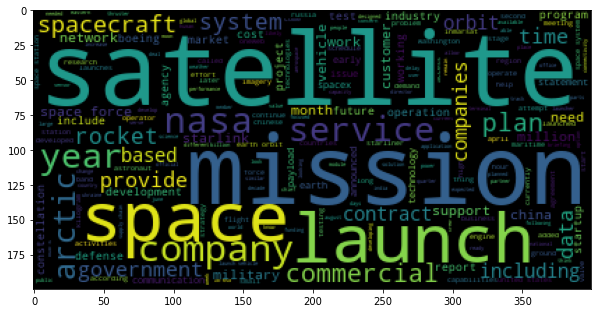

In [29]:
import matplotlib.pyplot as plt
import wordcloud as wc
colls= ''
tokens = []
for i, thing in enumerate(new_docs):
    tokens.append(thing.split(" "))


for d in tokens:
    collect = " ".join([w for w in d])
    colls = colls + " "+collect
colls

myCloud = wc.WordCloud().generate(colls)
plt.figure(figsize=(10,10))
plt.imshow(myCloud)

In [31]:
revlemma=[]
len_raw=[]
print('Building lemmas...')
for i,d in enumerate(new_docs[:100]):
  print(i,end='')
  len_raw.append(len(d))
  tdoc=nlp(d)
  # lm=" ".join([token.lemma_ for token in tdoc  if not(token.is_stop == True or token.is_punct == True or '_' in token.lemma_)])
  lm=" ".join([token.lemma_ for token in tdoc  if token.lemma_ != '-PRON-' and token.pos_ in ['NOUN','PROPN'] and token.is_stop == False and token.is_digit == False])
  revlemma.append(lm)
  print('\r\r\r\r\r\r\r\r',end='')
len_lemma=[len(d) for d in revlemma]
print('# of words (raw,pre): (%d,%d)'%(sum(len_raw),sum(len_lemma)))
print('Average # of words (raw,pre): (%.2f,%.2f)'%(sum(len_raw)/len(len_raw),sum(len_lemma)/len(len_lemma)))

Building lemmas...
# of words (raw,pre): (244021,153872)
Average # of words (raw,pre): (2440.21,1538.72)


In [33]:
print('Tokenization')
dtoken=[gensim.utils.simple_preprocess(d, deacc= True, min_len=3) for d in revlemma] 
print('Building bigrams')
from gensim.models.phrases import Phrases, Phraser
phrases  = Phrases(dtoken, min_count = 2,threshold=9)
bigram=Phraser(phrases)
bdocs=[bigram[d] for d in dtoken]

Tokenization
Building bigrams


In [34]:
dictionary=Dictionary(bdocs)
print(dictionary)
dictionary.filter_extremes(keep_n = 10000, no_above= 0.9, no_below = len(bdocs)*.01) # no_below 1%
print(dictionary)
corpus_bof=[dictionary.doc2bow(d) for d in bdocs]
tfidf = TfidfModel(corpus_bof)
corpus_tfidf = tfidf[corpus_bof]

Dictionary(3328 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'americas']...)
Dictionary(3328 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'americas']...)


# Applying

## Bag of words

In [ ]:
K=[10,20,30,40]
alpha=['symmetric','asymmetric','auto']
eta=['symmetric','auto']
passes=[50,100,200]
cv=[]
vocab = list(dictionary.values())
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
  for a in alpha:
    for b in eta:
      for p in passes:
        lda = LdaModel(corpus = corpus_bof,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = a, eta=b,per_word_topics = True,passes = p)
        lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
        cv_cohe=lda_cv.get_coherence()
        print('K: %2d alfa: %10s beta: %10s passes: %3d coherence: %.3f'%(k,a,b,p,cv_cohe))
        cv.append(cv_cohe)

## TF-IDF

In [ ]:
K=[10,20,30,40]
alpha=['symmetric','asymmetric','auto']
eta=['symmetric','auto']
passes=[50,100,200]
cv=[]
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
  for a in alpha:
    for b in eta:
      for p in passes:
        lda = LdaModel(corpus = corpus_tfidf,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = a, eta=b,per_word_topics = True,passes = p)
        lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
        cv_cohe=lda_cv.get_coherence()
        print('K: %2d alfa: %10s beta: %10s passes: %3d coherence: %.3f'%(k,a,b,p,cv_cohe))
        cv.append(cv_cohe)

In [ ]:
print(dictionary)
vocab = list(dictionary.values())
[print(v) for v in dictionary.values()]
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))